# Students (Mat) Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<AxesSubplot:ylabel='G3'>

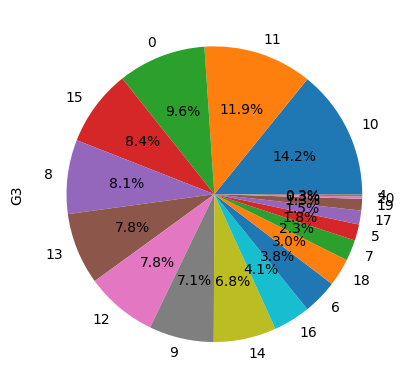

In [3]:
df = pd.read_csv("../Cleaned/Students/student-mat.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['G3'].value_counts())
df['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Sex

F    208
M    187
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

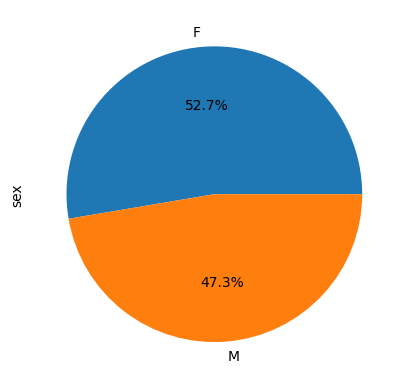

In [4]:
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = M

10    26
12    20
11    18
8     18
15    17
0     15
13    14
14    13
9     11
16    10
18     7
7      5
5      4
17     3
19     3
6      2
20     1
Name: G3, dtype: int64


<AxesSubplot:ylabel='G3'>

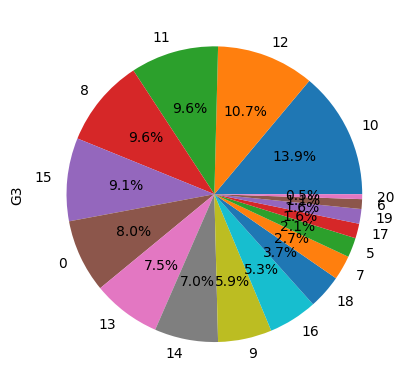

In [5]:
print(df.loc[df['sex']=="M"]['G3'].value_counts())
df.loc[df['sex']=="M"]['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = F

10    30
11    29
0     23
13    17
9     17
15    16
14    14
8     14
6     13
12    11
16     6
18     5
7      4
5      3
17     3
19     2
4      1
Name: G3, dtype: int64


<AxesSubplot:ylabel='G3'>

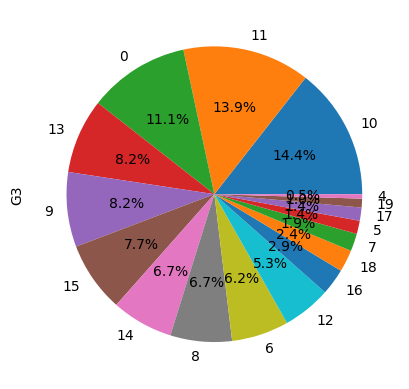

In [6]:
print(df.loc[df['sex']=="F"]['G3'].value_counts())
df.loc[df['sex']=="F"]['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >=10

let y- = <10

let s0 = M

let s1 = F

In [7]:
# p(y+|s0) -> p(>=10|M)
p1 = len(df.loc[(df['sex']=="M") & (df['G3']>=10)]) / len(df.loc[df['sex']=="M"])
#print(p1)
# p(y-|s1) -> p(<10|F)
p2 = len(df.loc[(df['sex']=="F") & (df['G3']<10)]) / len(df.loc[df['sex']=="F"])
#print(p2)
# p(y+|s1) -> p(>=10|F)
p3 = len(df.loc[(df['sex']=="F") & (df['G3']>=10)]) / len(df.loc[df['sex']=="F"])
#print(p3)
# p(y-|s0) -> p(<10|M)
p4 = len(df.loc[(df['sex']=="M") & (df['G3']<10)]) / len(df.loc[df['sex']=="M"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.353


In [8]:
#OR for s0 = Female
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 0.739


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >=10

let y- = <10

let s0 = M

let s1 = F

In [9]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.104


### Proxies

Most of the proxies found for sex include (a combination of):
 - 

Best model (min depth) found with a node at depth 1 with 2 samples.

	** Fedu <= 0.5 ,  #impurity: 0.0, #samples: 2.

Best model (max sample) found with 41 sample in a node at depth 8.

    ** Walc <= 3.5 , G1 <= 10.5 , studytime > 1.5 , Medu <= 3.5 , G1 > 4.0 , traveltime <= 2.5 , Medu > 1.5 , famrel <= 4.5 ,  #impurity: 0.0, #samples: 41.
    
    
Other:

    ** Walc > 3.5 , schoolsup_no > 0.5 , goout > 1.5 , health > 2.5 , paid_no > 0.5 , Dalc > 1.5 ,  #impurity: 0.0, #samples: 22.
        

For proxy: Fedu <= 0.5

M    2
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

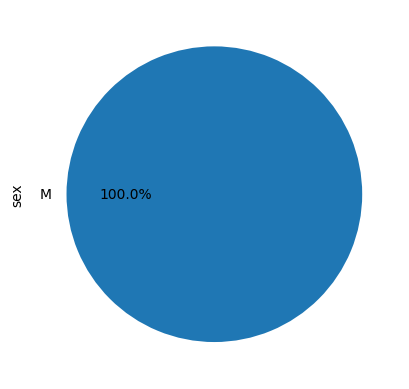

In [10]:
print(df.loc[(df['Fedu']<=0.5)]['sex'].value_counts())
df.loc[(df['Fedu']<=0.5)]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

10    1
16    1
Name: G3, dtype: int64


<AxesSubplot:ylabel='G3'>

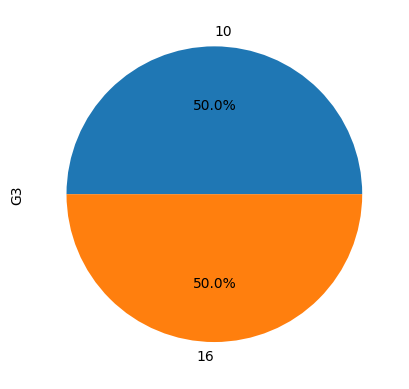

In [11]:
print(df.loc[(df['Fedu']<=0.5)]['G3'].value_counts())
df.loc[(df['Fedu']<=0.5)]['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >=10

let y- = <10

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [12]:
# p(y+|s0) -> p(>=10|Proxy)
p1 = len(df.loc[(df['Fedu']<=0.5) & (df['G3']>=10)]) / len(df.loc[(df['Fedu']<=0.5)])
#print(p1)
# p(y-|s1) -> p(<10|!Proxy)
p2 = len(df.loc[(df['Fedu']>0.5) & (df['G3']<10)]) / len(df.loc[(df['Fedu']>0.5)])
#print(p2)
# p(y+|s1) -> p(>=10|!Proxy)
p3 = len(df.loc[(df['Fedu']>0.5) & (df['G3']>=10)]) / len(df.loc[(df['Fedu']>0.5)])
#print(p3)
# p(y-|s0) -> p(<10|Proxy)
p4 = len(df.loc[(df['Fedu']<=0.5) & (df['G3']<10)]) / len(df.loc[(df['Fedu']<=0.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

ZeroDivisionError: float division by zero

### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >=10

let y- = <10

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [13]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.494


For proxy: Walc <= 3.5 , G1 <= 10.5 , studytime > 1.5 , Medu <= 3.5 , G1 > 4.0 , traveltime <= 2.5 , Medu > 1.5 , famrel <= 4.5

F    41
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

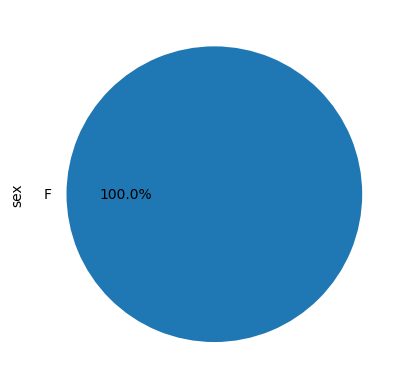

In [14]:
print(df.loc[(df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5)]['sex'].value_counts())
df.loc[(df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5)]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

10    9
0     9
9     7
6     6
8     5
11    2
5     1
13    1
7     1
Name: G3, dtype: int64


<AxesSubplot:ylabel='G3'>

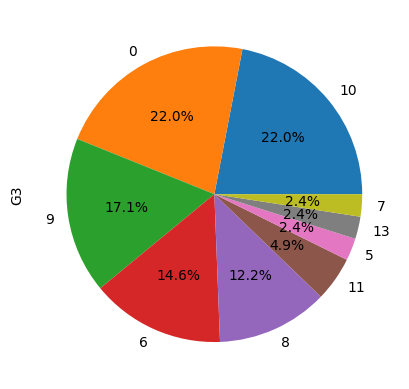

In [15]:
print(df.loc[(df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5)]['G3'].value_counts())
df.loc[(df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5)]['G3'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >=10

let y- = <10

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [16]:
# (df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5)
# p(y+|s0) -> p(>=10|Proxy)
p1 = len(df.loc[(df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5) & (df['G3']>=10)]) / len(df.loc[(df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5)])
#print(p1)
# p(y-|s1) -> p(<10|!Proxy)
p2 = len(df.loc[((df['Walc']>3.5) | (df['G1']>10.5) | (df['studytime']<=1.5) | (df['Medu']>3.5) | (df['G1']<=4.0) | (df['traveltime']>2.5) | (df['Medu']<=1.5) | (df['famrel']>4.5)) & (df['G3']<10)]) / len(df.loc[((df['Walc']>3.5) | (df['G1']>10.5) | (df['studytime']<=1.5) | (df['Medu']>3.5) | (df['G1']<=4.0) | (df['traveltime']>2.5) | (df['Medu']<=1.5) | (df['famrel']>4.5))])
#print(p2)
# p(y+|s1) -> p(>=10|!Proxy)
p3 = len(df.loc[((df['Walc']>3.5) | (df['G1']>10.5) | (df['studytime']<=1.5) | (df['Medu']>3.5) | (df['G1']<=4.0) | (df['traveltime']>2.5) | (df['Medu']<=1.5) | (df['famrel']>4.5)) & (df['G3']>=10)]) / len(df.loc[((df['Walc']>3.5) | (df['G1']>10.5) | (df['studytime']<=1.5) | (df['Medu']>3.5) | (df['G1']<=4.0) | (df['traveltime']>2.5) | (df['Medu']<=1.5) | (df['famrel']>4.5))])
#print(p3)
# p(y-|s0) -> p(<10|Proxy)
p4 = len(df.loc[(df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5) & (df['G3']<10)]) / len(df.loc[(df['Walc']<=3.5) & (df['G1']<=10.5) & (df['studytime']>1.5) & (df['Medu']<=3.5) & (df['G1']>4.0) & (df['traveltime']<=2.5) & (df['Medu']>1.5) & (df['famrel']<=4.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.165


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >=10

let y- = <10

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [21]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.410
